In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import animation

In [4]:
m1 = 1
m2 = 333000
m3 = 0.0123
x1_0 = 1
y1_0 = 0
x2_0 = 0
y2_0 = 0
vx1_0 = 0
vy1_0 = np.sqrt(m2) + 100
vx2_0 = 0
vy2_0 = 0

In [7]:
def dSdt(S,t):
    x1, y1, x2, y2, vx1, vy1, vx2, vy2 = S
    r12 = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return [
        vx1,
        vy1,
        vx2,
        vy2,
        m2/r12**3 * (x2 - x1),
        m2/r12**3 * (y2 - y1),
        m1/r12**3 * (x1 - x2),
        m1/r12**3 * (y1 - y2),
    ]

In [8]:
t = np.linspace(0,5,50000)
sol = odeint(dSdt, y0=[x1_0, y1_0, x2_0, y2_0, vx1_0, vy1_0, vx2_0, vy2_0],t=t)

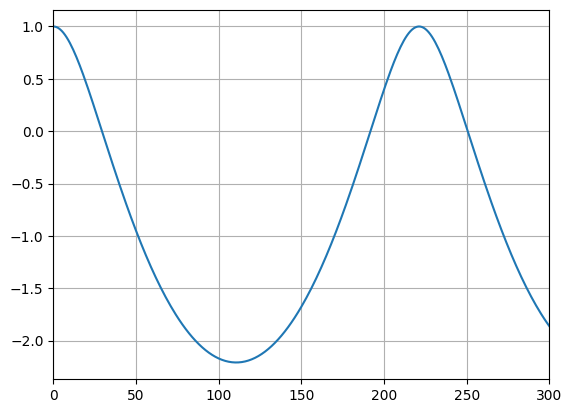

In [9]:
plt.plot(sol.T[0])
plt.xlim(0,300)
plt.grid()

In [10]:
x1 = sol.T[0]
y1 = sol.T[1]
x2 = sol.T[2]
y2 = sol.T[3]
x3 = sol.T[4]
y3 = sol.T[5]

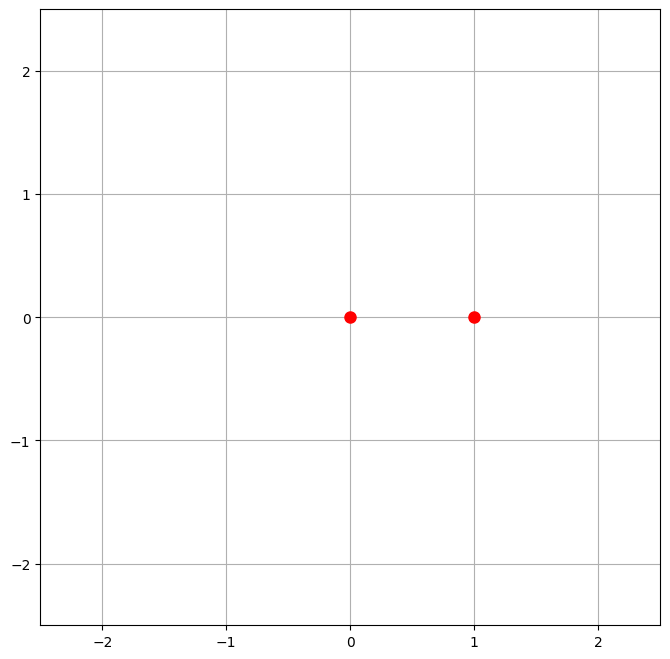

In [11]:
def animate(i):
    ln1.set_data([x1[i],x2[i], x3[i]],[y1[i],y2[i], y3[i]])
fig,ax = plt.subplots(1,1, figsize=(8,8))
ax.grid()
ln1, = plt.plot([],[], 'ro', lw=3, markersize=8)
ax.set_ylim(-2.5,2.5)
ax.set_xlim(-2.5,2.5)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('plan.gif', writer='pillow', fps=30)